<a href="https://colab.research.google.com/github/tiffanylagarde/tiffanylagarde/blob/main/K_Means_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# Configure pandas to display all columns
pd.set_option("display.max_columns", None)

In [3]:
df_cluster = pd.read_csv('bank_marketing_dataset.csv')

In [4]:
numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cluster.select_dtypes(include=['object']).columns
duration_col = ['duration']  # Column to log transform

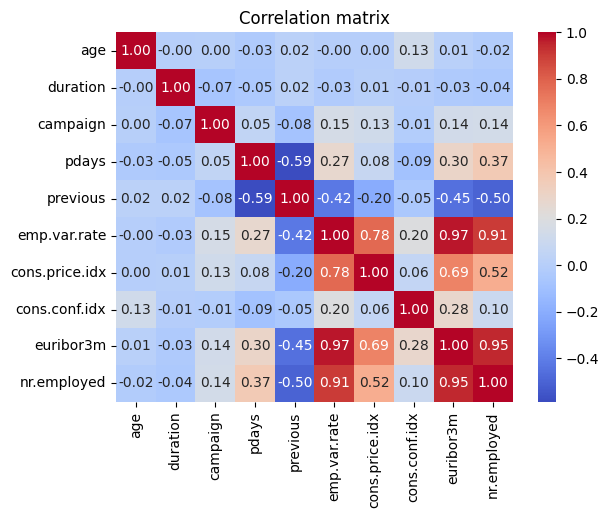

In [5]:
# Correlation matrix
corr = df_cluster[numerical_cols_c].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [6]:
df_cluster = df_cluster.drop(columns=['nr.employed', 'emp.var.rate'])

In [7]:
numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns

In [8]:
X_preprocessed_df = df_cluster.copy()
X_preprocessed_df['duration'] = np.log1p(df_cluster['duration'])

scaler = StandardScaler()
X_preprocessed_df[numerical_cols_c] = scaler.fit_transform(X_preprocessed_df[numerical_cols_c])

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_preprocessed_df[categorical_cols]),
                                   columns=encoder.get_feature_names_out(categorical_cols),
                                   index=X_preprocessed_df.index)

X_no_encoded = X_preprocessed_df.copy()

X_preprocessed_df.drop(columns=categorical_cols, inplace=True)

X_preprocessed_df = pd.concat([X_preprocessed_df, X_cat_encoded], axis=1)

print(X_preprocessed_df.shape)

X_preprocessed_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(41188, 63)


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,1.533034,0.431124,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.628993,-0.177114,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.290186,0.274738,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.002309,-0.162669,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.533034,0.607534,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Selecting continuous variables
X_cluster = X_preprocessed_df.copy()

# Removing one-hot encoded variables
prefixes = ['job_', 'marital_', 'education_', 'default_', 'housing_', 'loan_', 'contact_', 'month_', 'day_of_week_', 'poutcome_', 'subscribed_']
one_hot_cols = [col for col in X_preprocessed_df.columns if any(col.startswith(prefix) for prefix in prefixes)]
X_cluster = X_preprocessed_df.drop(one_hot_cols, axis=1)


**Iterating over different numbers of clusters**

In [10]:
 #Initializing lists to store evaluation metrics
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# Iterating over different numbers of clusters
for k in range(2, 11):
    # Creating KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fitting KMeans to the data
    kmeans.fit(X_cluster)

    # Calculating evaluation metrics
    silhouette.append(silhouette_score(X_cluster, kmeans.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X_cluster, kmeans.labels_))
    davies_bouldin.append(davies_bouldin_score(X_cluster, kmeans.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**Plotting evaluation metrics**

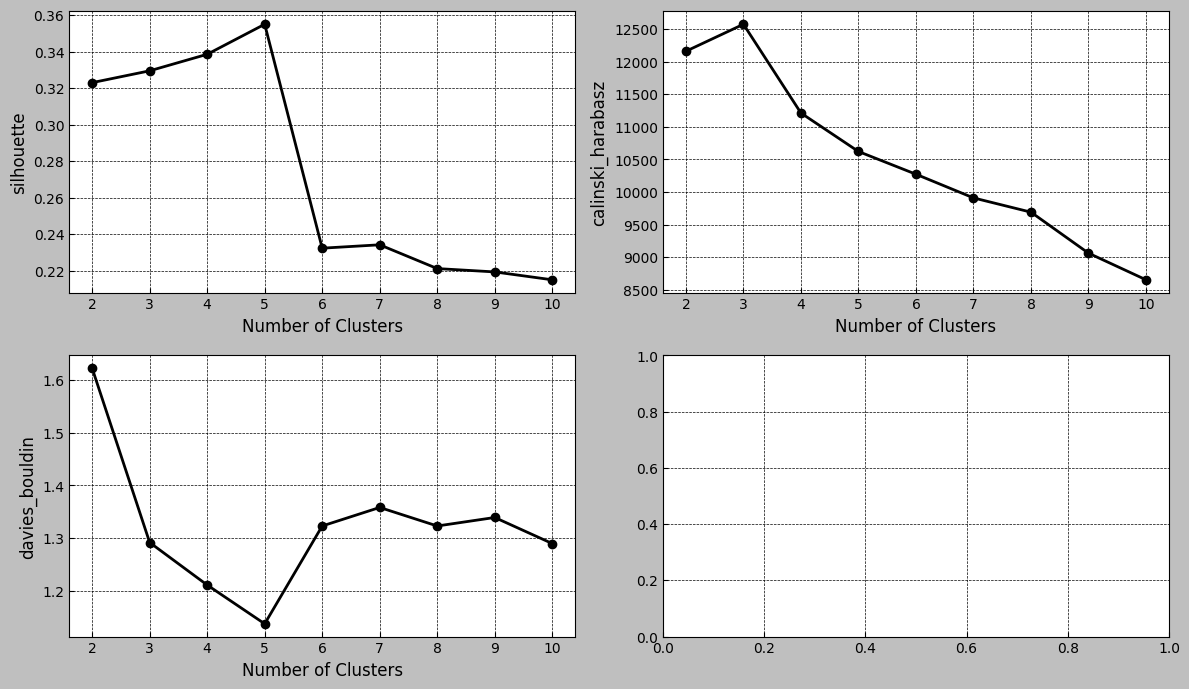

In [27]:
plt.style.use ('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items())

for i in range(2):
    for j in range(2):
        index = i*2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[i*2 + j]
            axs[i, j].plot(range(2, 11), metric_values , marker = 'o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()

**Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

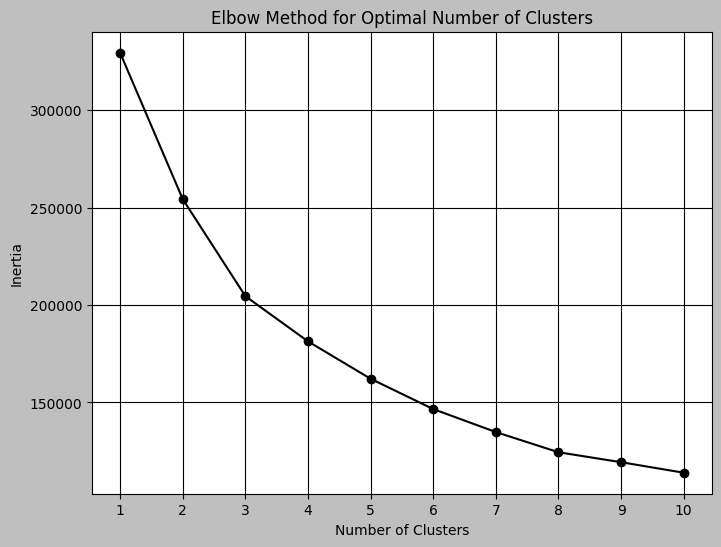

In [13]:
# Initialize an empty list to store inertia (within-cluster sum of squares) values
inertia = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit the KMeans model to the data
    kmeans.fit(X_cluster)
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


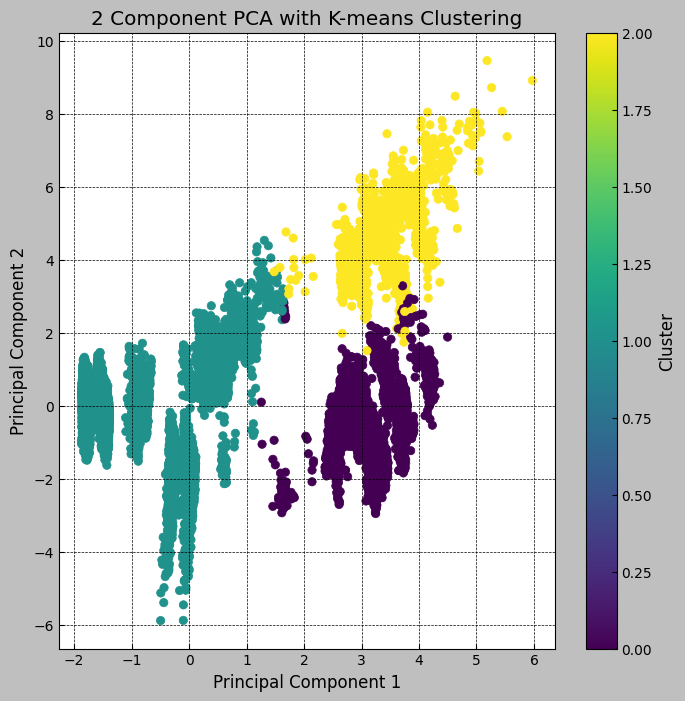

In [43]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_cluster)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

# Concatenate the principal components with the cluster labels
final_df1 = pd.concat([principal_df, pd.Series(kmeans.labels_, name='cluster')], axis=1)

# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.scatter(final_df1['principal component 1'], final_df1['principal component 2'], c=final_df1['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with K-means Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


**Fit KMeans with 3, 4 and 5 clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


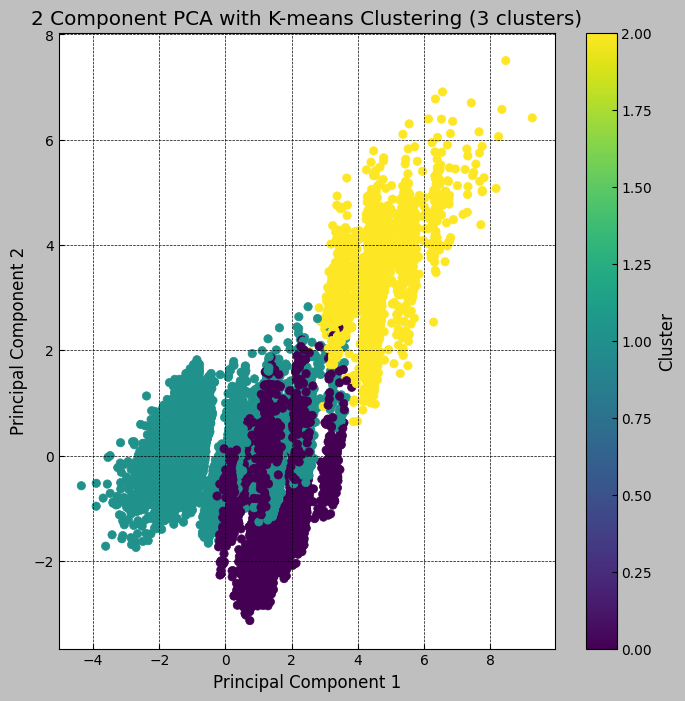

In [38]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_cluster)

# Concatenate the principal components with the cluster labels
final_df3 = pd.concat([principal_df, pd.Series(kmeans.labels_, name='cluster')], axis=1)

# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.scatter(final_df3['principal component 1'], final_df3['principal component 2'], c=final_df3['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with K-means Clustering (3 clusters)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


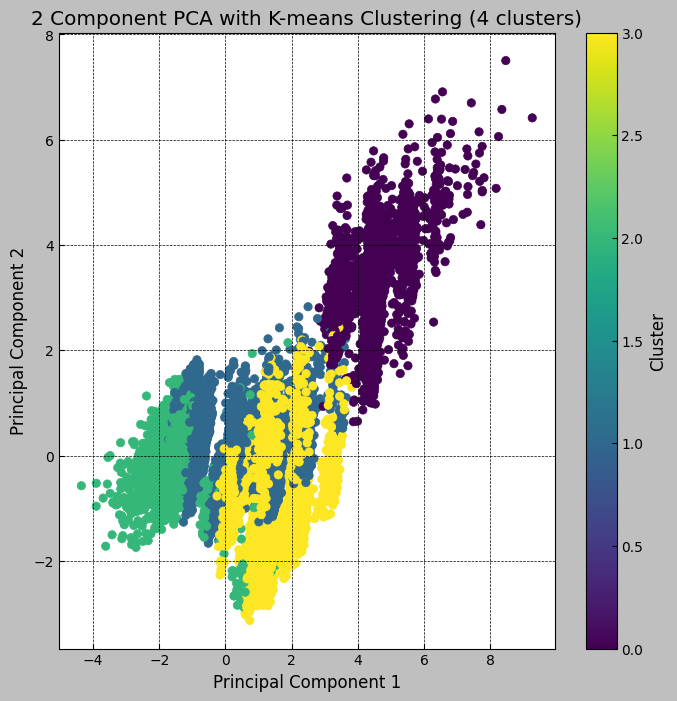

In [37]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_cluster)

# Concatenate the principal components with the cluster labels
final_df4 = pd.concat([principal_df, pd.Series(kmeans.labels_, name='cluster')], axis=1)

# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.scatter(final_df['principal component 1'], final_df4['principal component 2'], c=final_df4['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with K-means Clustering (4 clusters)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


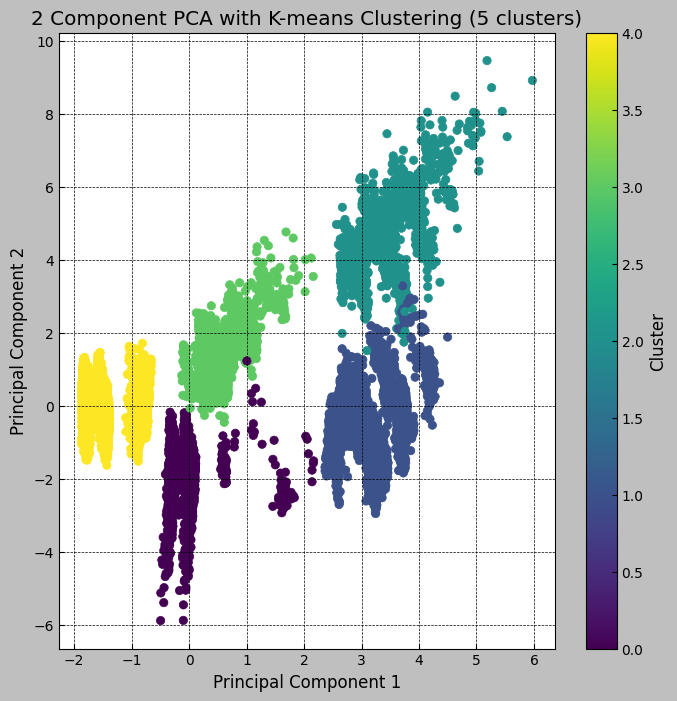

In [45]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X_cluster)

# Concatenate the principal components with the cluster labels
final_df = pd.concat([principal_df, pd.Series(kmeans.labels_, name='cluster')], axis=1)

# Plotting the clusters
plt.figure(figsize=(8, 8))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'], c=final_df['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with K-means Clustering (5 clusters)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

<ipython-input-36-10191a4fa312>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=final_df, palette='deep')


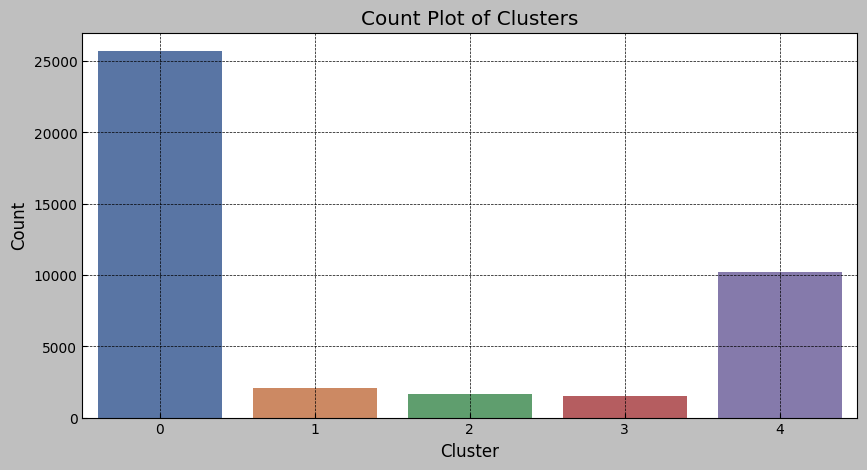

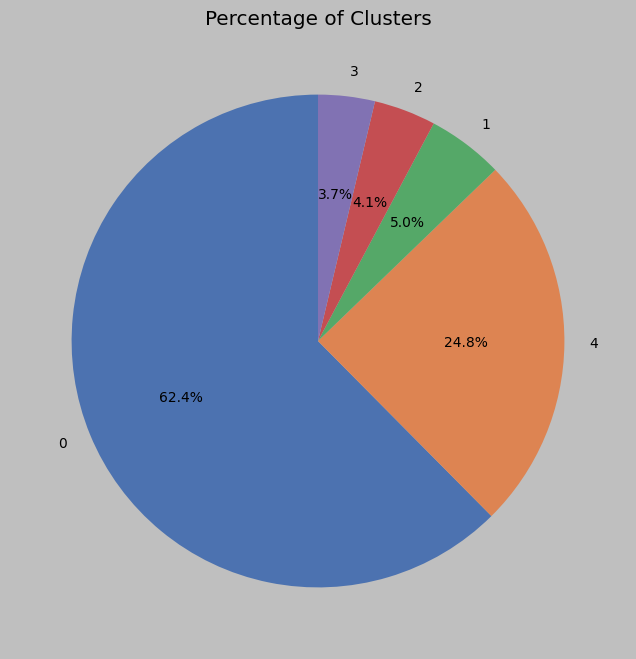

In [36]:
import seaborn as sns

# Count Plot of Clusters
plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', data=final_df, palette='deep')
plt.title('Count Plot of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Percentage of Clusters
cluster_counts = final_df['cluster'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("deep"))
plt.title('Percentage of Clusters')
plt.show()


Comparaison with 3 clusters

<ipython-input-41-88cf52afbe52>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=final_df3, palette='deep')


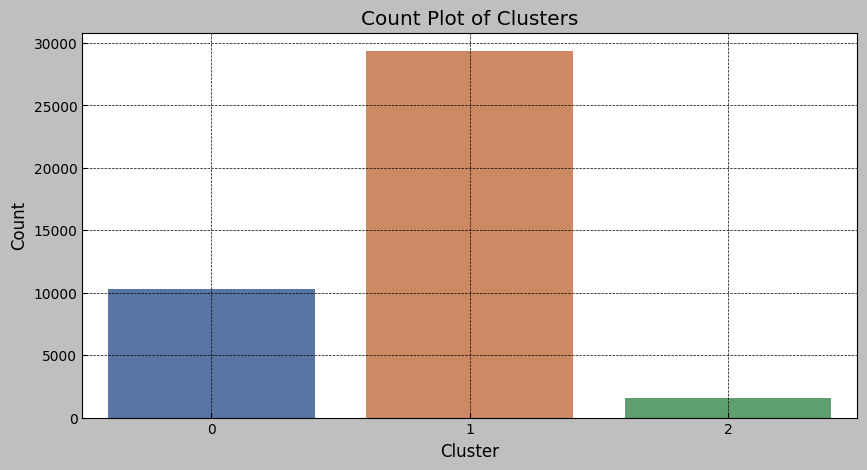

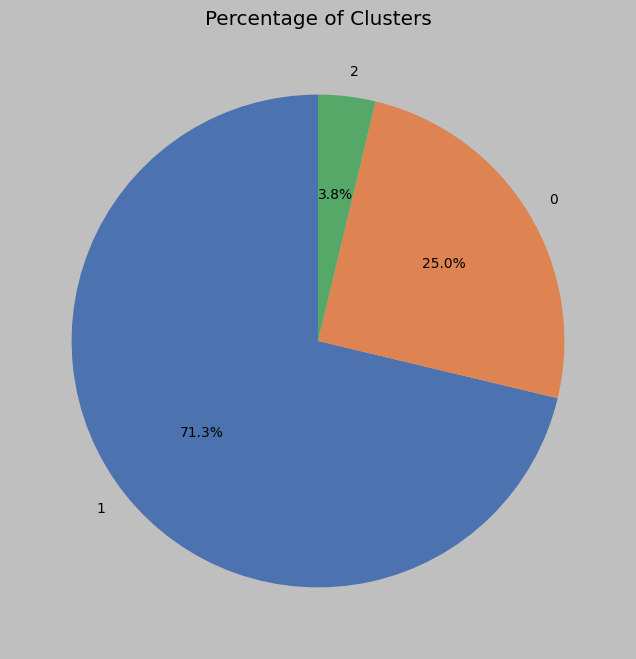

In [41]:
import seaborn as sns

# Count Plot of Clusters
plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', data=final_df3, palette='deep')
plt.title('Count Plot of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Percentage of Clusters
cluster_counts = final_df3['cluster'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("deep"))
plt.title('Percentage of Clusters')
plt.show()


**Interpretation of clusters**

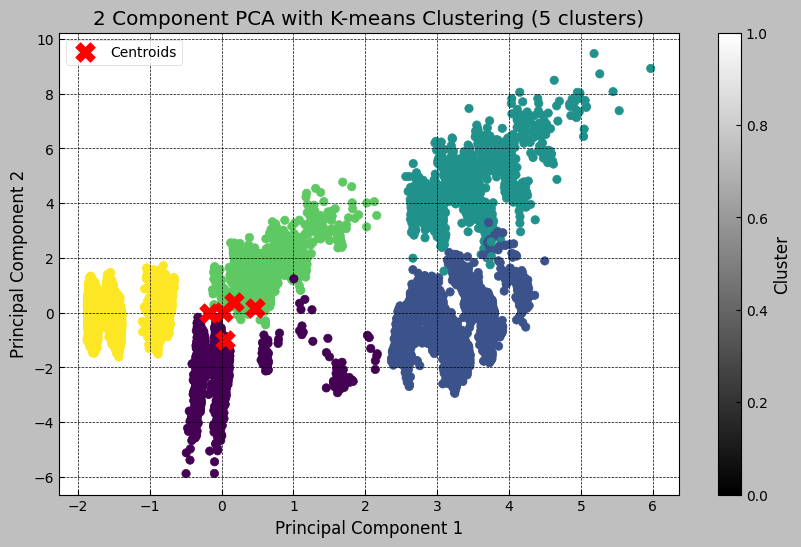

In [46]:
# Calculate cluster centroids
centroids = kmeans.cluster_centers_

# Analyze mean values of features within each cluster
cluster_means = X_cluster.groupby(kmeans.labels_).mean()

# Visualize centroids
plt.figure(figsize=(10, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'], c=final_df['cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with K-means Clustering (5 clusters)')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-47-df93f0369a3a>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=X_cluster, x=column, hue=kmeans.labels_, fill=True, alpha=0.5, multiple='stack')
<ipython-input-47-df93f0369a3a>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=X_cluster, x=column, hue=kmeans.labels_, fill=True, alpha=0.5, multiple='stack')
<ipython-input-47-df93f0369a3a>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=X_cluster, x=column, hue=kmeans.labels_, fill=True, alpha=0.5, multiple='stack')


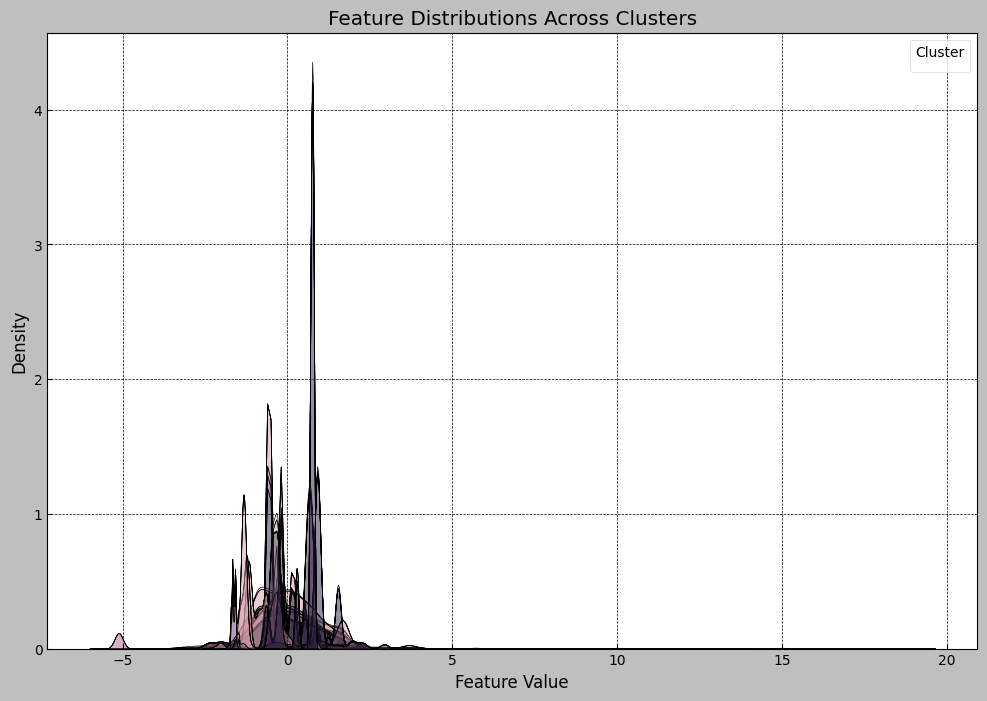

In [47]:
# Analyze mean values of features within each cluster
cluster_means = X_cluster.groupby(kmeans.labels_).mean()

# Visualize feature distributions across clusters
plt.figure(figsize=(12, 8))
for column in cluster_means.columns:
    sns.kdeplot(data=X_cluster, x=column, hue=kmeans.labels_, fill=True, alpha=0.5, multiple='stack')
plt.title('Feature Distributions Across Clusters')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y, test_size=0.2, random_state=1)

# Fit KMeans to the training data
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(X_train)

# Obtain cluster labels for both train and test data
train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)

# Concatenate the cluster labels with the original features
X_train_with_clusters = np.column_stack((X_train, train_cluster_labels))
X_test_with_clusters = np.column_stack((X_test, test_cluster_labels))

# Train logistic regression model with cluster labels as additional features
classifier = LogisticRegression()
classifier.fit(X_train_with_clusters, y_train)

# Predict on test set
predictions = classifier.predict(X_test_with_clusters)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



NameError: name 'y' is not defined